<a href="https://colab.research.google.com/github/ThePituLegend/RISCV-MISE/blob/main/Ejemplo_Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

Implementa un bloque (estructural) que permita realizar sumas o multiplicaciones de dos valores de _n_ bits.

Realizar una operación o otra se escoge con una señal de control de 1 bit (a 0 para la suma, a 1 para la multipicación)

Dispones de bloque sumador y multiplicador, así como del resto de bloques fundamentales.

In [1]:
# @title Carga de Py4Hw { display-mode: "form" }
# @markdown Desde GitHub

!pip install nbwavedrom                             &> /dev/null
!git clone https://github.com/ThePituLegend/py4hw   &> /dev/null
%cd /content/py4hw
from py4hw import *

if "py4hw" in dir():
  print("OK")
else:
  print("ERROR")

/content/py4hw
OK


## Diseño del bloque

Completa la clase siguiente con tu implementación del bloque.

In [3]:
class SumMul(Logic):
  """
  Sumador / Multiplicador Estructural
  Si sel = 0 => out = a + b
  Si sel = 1 => out = a * b
  """
  def __init__(self, parent: Logic, name: str, a: Wire, b: Wire, sel: Wire, out: Wire):
    super().__init__(parent, name)

    a = self.addIn("A", a)
    b = self.addIn("B", b)
    sel = self.addIn("sel", sel)
    out = self.addOut("res", out)

    # TODO: Crea los cables intermedios
    sum2mux = self.wire("Sum->mux(0)", 32)        # Alumno
    mul2mux = self.wire("Mul->mux(1)", 32)        # Alumno

    # TODO: Instanciar los bloques necesarios
    Add(self, "Sum", a, b, sum2mux)               # Alumno
    #Mul(self, "Mul", a, b, mul2mux)               # Alumno (Correcto)
    Mul(self, "Mul", a, a, mul2mux)               # Alumno (Incorrecto)
    Mux2(self, "Mux", sel, sum2mux, mul2mux, out) # Alumno

iter 3 cost: 0 False


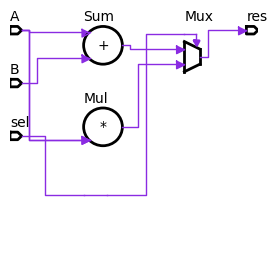

In [4]:
# @title Esquemático del circuito implementado { display-mode: "form" }

schm = HWSystem()

a = schm.wire("A", 32)
b = schm.wire("B", 32)
sel = schm.wire("sel", 1)
res = schm.wire("res", 32)

sm = SumMul(schm, "Sum/Mul", a, b, sel, res)

Schematic(sm)

In [20]:
# @title ¿Es correcto mi circuito? { display-mode: "form" }
# @markdown Tu circuito va a pasar una prueba automatizada para comprobar su validez

from IPython.display import Markdown, display
pprint = lambda x: display(Markdown(x))

test = HWSystem()

a = test.wire("A", 32)
b = test.wire("B", 32)
sel = test.wire("sel", 1)
res = test.wire("res", 32)

sm = SumMul(test, "Sum/Mul", a, b, sel, res)

sol = [3, 7, 11, 15, 2, 12, 30, 56]

n1 = Sequence(test, "N1", [1, 3, 5, 7], a)
Sequence(test, "N2", [2, 4, 6, 8], b)
Sequence(test, "SEL", [0, 0, 0, 0, 1, 1, 1, 1], sel)

sol_w = test.wire("Solución",32)
Sequence(test, "Solución", sol, sol_w)

wf = Waveform(test, "TEST", [a, b, sel, res, sol_w])

sim = test.getSimulator()

err = 0

for i, val in enumerate(sol):
  sim.clk(1)
  
  if res.get() != val:
    err += 1
    pprint(f"- **CLK {i+1}**: ¡Se esperaba **{val}** y se ha obtenido **{res.get()}**!")
    wf.waves[res]["wave"] =  wf.waves[res]["wave"][:-1] + "4"

if err == 0:
  pprint("**¡Circuito correcto!**")
else:
  pprint(f"**{err}** errores encontrados.")

draw_waveform(wf.get_waveform())
    

- **CLK 5**: ¡Se esperaba **2** y se ha obtenido **1**!

- **CLK 6**: ¡Se esperaba **12** y se ha obtenido **9**!

- **CLK 7**: ¡Se esperaba **30** y se ha obtenido **25**!

- **CLK 8**: ¡Se esperaba **56** y se ha obtenido **49**!

**4** errores encontrados.